In [1]:
import ads
import numpy as np
import matplotlib.pyplot as plt
import re
from unidecode import unidecode

In [2]:
#List of UDP Astro faculty
faculty = [
    "Aravena, M",
    "Assef, R",
    "Cieza, L",
    "Jenkins, J",
    "Johnston, E",
    "Jofre, P",
    "Mazzucchelli, C",
    "Prieto, J",
    "Ricci, C",
    "Yang, B",
    "Zurlo, A"
]

In [3]:
#List of UDP Astro students
students = [
    'Batalla Falcon, G', 
    'Brito Silva, D', 
    'De Brito Silva, D', 
    'Gonzalez Ruilova, C',
    'Gupta, K',
    'Hueichapan, E',
    'Jegatheesan, K',
    'Lambert, T', 
    'Nogueira, P', 
    'Pena Rojas, P',
    'Pessi, T',
    'Posses, A', 
    'Solimano, M',
    'Vitali, S',
    'Zewdie, D', 
    'de Brito Silva, D'
]

In [4]:
#People that have incorrectly had the affiliation in a paper.
black_listed = [
    'Apostolovski, Y',
    'Avenhaus, H',
    'Baughman, J', 
    'Brodie, J',
    'Carbillet, M', 
    'Casassus, S', 
    'Chauvin, G', 
    'Desgrange, C', 
    'Gilmore, G', 
    'Honig, S',
    'Lopez, H',
    'Perez, S',
    'Phadke, K', 
    'Reuter, C',
]

In [5]:
#Search for all papers from UDP in ADS in a given year.
def paper_search(year):
    q = ads.SearchQuery(aff="portales", year=year, fl=["author", "citation_count", "aff", "property", "doctype", "title"], max_pages=100)
    ql = list(q)
    return ql

In [6]:
def proc_name(input_name):
    name = unidecode(input_name)
    name = re.sub("-"," ", name)
    name = re.sub("^(.*?\, .).*$",r"\1", name)
    return name

In [7]:
#Distribute publications between UDP authors.
def get_n_papers(ads_query_list, only_faculty=False):
    n_papers = dict()
    for paper in ads_query_list:

        #Only process refereed articles.
        if 'REFEREED' in paper.property and paper.doctype=='article':
            pass
        else:
            continue

        udp_auth = list()
        for k in range(len(paper.author)):
            name = proc_name(paper.author[k])
            if not only_faculty or name in faculty:
                if re.search("portales", paper.aff[k], flags=re.IGNORECASE):
                    if name in faculty or (re.search("astro", paper.aff[k], flags=re.IGNORECASE) and name not in black_listed):
                        udp_auth.append(name)
                        if k==0 and name in students:
                            break
        for name in udp_auth:
            if name in n_papers:
                n_papers[name] += 1./len(udp_auth)
            else:
                n_papers[name] = 1./len(udp_auth)
    return n_papers

In [8]:
ql = dict()
years = np.arange(2013, 2023)
for year in years:
    ql[year] = paper_search(year)

In [9]:
#Sort dividing papers as they go for incentivos.
n_papers1 = dict()
for year in years:
    n_papers1[year] = get_n_papers(ql[year])

In [10]:
#Print all authors that have used the UDP affiliation.
all_keys = list()
for year in years:
    keys = list(n_papers1[year].keys())
    all_keys.extend(keys)
np.unique(all_keys)

array(['Aguilera Gomez, C', 'Aravena, M', 'Assef, R', 'Batalla Falcon, G',
       'Bertrang, G', 'Bhowmik, T', 'Brisbin, D', 'Brito Silva, D',
       'Cieza, L', 'De Brito Silva, D', 'Diaz Santos, T',
       'Gonzalez Lopez, J', 'Gonzalez Ruilova, C', 'Guaita, L',
       'Gupta, K', 'Hueichapan, E', 'Infante, L', 'Jegatheesan, K',
       'Jenkins, J', 'Jiang, C', 'Jofre, P', 'Johnston, E', 'Kawamuro, T',
       'Lambert, T', 'Madler, T', 'Maia, M', 'Mazzucchelli, C',
       'Muzic, K', 'Nogueira, P', 'Pena Rojas, P', 'Pessi, T',
       'Posses, A', 'Prieto, J', 'Principe, D', 'Ricci, C',
       'Romero Canizales, C', 'Ruiz Rodriguez, D', 'Samadi Ghadim, A',
       'Solimano, M', 'Temple, M', 'Tortosa, A', 'Tucci Maia, M',
       'Vitali, S', 'Yang, B', 'Zewdie, D', 'Zurlo, A',
       'de Brito Silva, D'], dtype='<U19')

In [11]:
#Get the median for each year. 
median_papers1 = np.zeros(years.shape)
av_papers1 = np.zeros(years.shape)
for i, year in enumerate(years):
    aux = list()
    for name in faculty:
        if name in n_papers1[year]:
            aux.append(n_papers1[year][name])
    median_papers1[i] = np.median(aux)
    av_papers1[i] = np.average(aux)

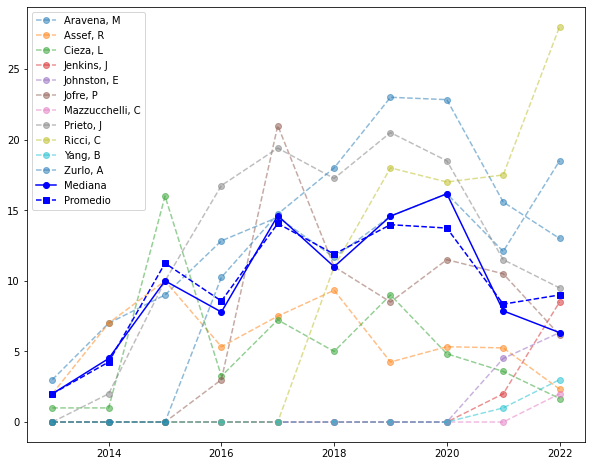

In [12]:
#Plot the evolution of faculty papers counting for incentivos. 
fig, ax = plt.subplots(1, figsize=(10,8))
for name in faculty:
    x = np.zeros(years.shape)
    for k,year in enumerate(years):
        if name in n_papers1[year]:
            x[k] = n_papers1[year][name]
    ax.plot(years, x, '--o', label=name, alpha=0.5)
ax.plot(years, median_papers1, '-bo', label='Mediana')
ax.plot(years, av_papers1, '--bs', label='Promedio')
ax.legend()
plt.show()

In [13]:
#Sort dividing papers only considering faculty.
n_papers2 = dict()
for year in years:
    n_papers2[year] = get_n_papers(ql[year], only_faculty=True)

In [14]:
#Get the median for each year. 
median_papers2 = np.zeros(years.shape)
av_papers2 = np.zeros(years.shape)
for i, year in enumerate(years):
    aux = list()
    for name in faculty:
        if name in n_papers2[year]:
            aux.append(n_papers2[year][name])
    median_papers2[i] = np.median(aux)
    av_papers2[i] = np.average(aux)

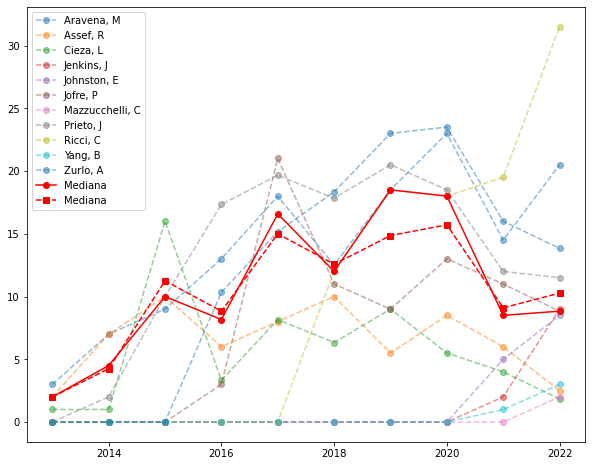

In [15]:
#Plot the evolution of all faculty papers. 
fig, ax = plt.subplots(1, figsize=(10,8))
for name in faculty:
    x = np.zeros(years.shape)
    for k,year in enumerate(years):
        if name in n_papers2[year]:
            x[k] = n_papers2[year][name]
    ax.plot(years, x, '--o', label=name, alpha=0.5)
ax.plot(years, median_papers2, '-ro', label='Mediana')
ax.plot(years, av_papers2, '--rs', label='Mediana')
ax.legend()
plt.show()

In [16]:
#Calculate the average number of papers a faculty member is responsible for. 
av_papers3 = np.zeros(years.shape)
nf = np.zeros(years.shape)
ntp = np.zeros(years.shape)
for i,year in enumerate(years):
    #Find how many faculty there were at UDP.
    for name in faculty:
        if name in n_papers1[year]:
            nf[i] += 1
    #Now, find the total number of astro papers for that year. 
    ntp[i] = np.sum(list(n_papers1[year].values()))
    #Now, get the average paper per faculty.
    av_papers3[i] = ntp[i]/nf[i]

In [17]:
for i, year in enumerate(years):
    print("{}: {} ({})".format(year, ntp[i], nf[i]))

2013: 6.0 (3.0)
2014: 18.0 (4.0)
2015: 59.0 (4.0)
2016: 72.0 (6.0)
2017: 111.0 (6.0)
2018: 111.0 (7.0)
2019: 118.0 (7.0)
2020: 126.0 (7.0)
2021: 118.0 (10.0)
2022: 128.0 (11.0)


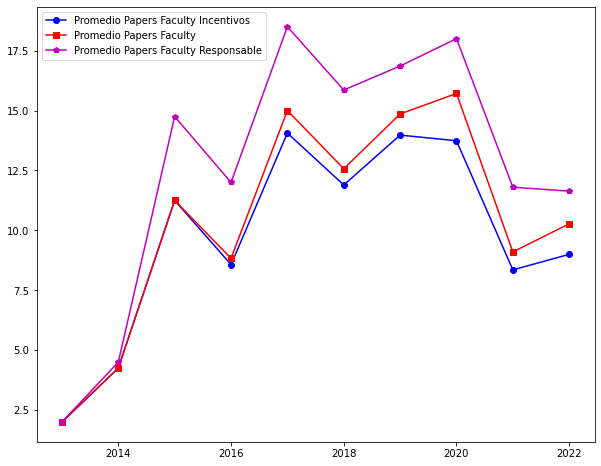

In [18]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.plot(years, av_papers1, '-bo', label="Promedio Papers Faculty Incentivos")
ax.plot(years, av_papers2, '-rs', label="Promedio Papers Faculty")
ax.plot(years, av_papers3, '-mp', label="Promedio Papers Faculty Responsable")
ax.legend()
plt.show()

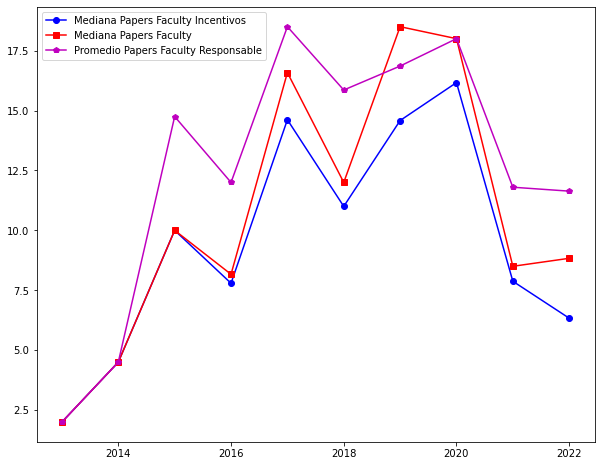

In [19]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.plot(years, median_papers1, '-bo', label="Mediana Papers Faculty Incentivos")
ax.plot(years, median_papers2, '-rs', label="Mediana Papers Faculty")
ax.plot(years, av_papers3, '-mp', label="Promedio Papers Faculty Responsable")
ax.legend()
plt.show()